**ALUNO:** LEONARDO ALVES DIAS

**CURSO:** MBA EM BI & DATA SCIENCE

***FONTE DE DADOS***

https://github.com/leodiasx99/Diabetes/blob/main/diabete_trabalho_30_v1.xlsx

*A base que está sendo carregada já tem os dados tratados de acordo com o passo a passo do tratamento dos dados abaixo, pois o dataframe, não salva as alterações/modificações.*

***IMPORTAÇÃO DAS BIBLIOTECAS***

In [325]:
#Para a modelagem de dados
import pandas as pd 

# Utilização de recursos matemáticos
import numpy as np

# Para a plotagem de dados
import matplotlib.pyplot as plt
import seaborn as sns

***CARREGAMENTO DOS DADOS***

In [326]:
dados = pd.read_excel('https://github.com/leodiasx99/Diabetes/blob/main/diabete_trabalho_30_v1.xlsx?raw=true', sheet_name = "Dados")

***VISUALIZAÇÃO DO DADOS***

In [327]:
dados.head(5)

,Id,Numero_gestacoes,Glicose_mg/dl,Pressao_arterial_mmHg,IMC_kg/m²,Idade_anos_01/01/2023,Diabete_0_1
0,2,15,136,70,37.1,43,1
1,3,14,100,78,36.6,46,1
2,4,14,175,62,33.6,38,1
3,5,13,126,90,43.4,42,1
4,6,13,152,90,26.8,43,1


***VERIFICAÇÃO DO TIPO DE DADOS**

In [328]:
# Tratado diretamente no aquivo

dados.dtypes
# os campos (Numero_gestacoes) e (Idade_anos_01/01/2023) estão como OBJ deveriam ser INT64 de acordo com a base.
# Provavelmente existem dados inconsistentes nestas colunas com tipos de dados diferentes.

Id                         int64
Numero_gestacoes           int64
Glicose_mg/dl              int64
Pressao_arterial_mmHg      int64
IMC_kg/m²                float64
Idade_anos_01/01/2023      int64
Diabete_0_1                int64
dtype: object

**VERIFICAÇÂO DO TIPO DE VARIÁVEIS**

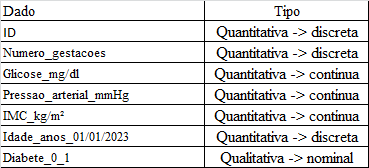

**TRATAMENTO DE DADOS 1 - Removendo dados incosistentes**

In [329]:
# Tratado diretamente no aquivo

# Index 95 da coluna Idade_anos_01/01/2023 estava com data
# Index 261 da coluna Idade_anos_01/01/2023 estava com data
# Index 518 da coluna Numero gestações estava com letra

#dados = dados.drop([95,261,518],axis=0)

**TRATAMENTO DE DADOS 2 - Alterando o tipo de dados**

In [330]:
dados['Numero_gestacoes'] = dados['Numero_gestacoes'].astype('int64')
dados['Idade_anos_01/01/2023'] = dados['Idade_anos_01/01/2023'].astype('int64')
dados.dtypes

Id                         int64
Numero_gestacoes           int64
Glicose_mg/dl              int64
Pressao_arterial_mmHg      int64
IMC_kg/m²                float64
Idade_anos_01/01/2023      int64
Diabete_0_1                int64
dtype: object

**TRATAMENTO DE DADOS 3 - Removendo linhas que tenha alguma variável sem preeenchimento**

In [331]:
# Tratado diretamente no aquivo

***VERIFICAMOS A CORRELAÇÃO DAS VARIÁVEIS***

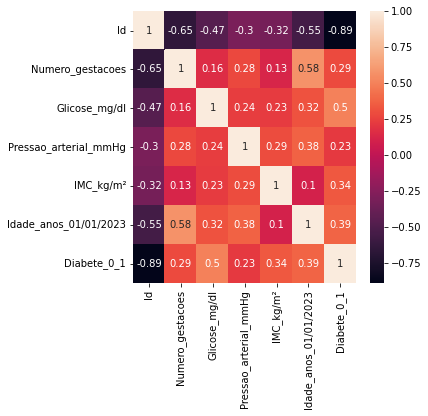

In [332]:
# 0.9 para mais ou para menos indica uma correlação muito forte.
# 0.7 a 0.9 positivo ou negativo indica uma correlação forte.
# 0.5 a 0.7 positivo ou negativo indica uma correlação moderada.
# 0.3 a 0.5 positivo ou negativo indica uma correlação fraca.
# 0 a 0.3 positivo ou negativo indica uma correlação desprezível.

# Logo temos as seguintes correlações:
# 1 - Correlação positiva e moderada entre o numero de gestações e a idade
# 2 - Correlação positiva e moderada entre a Diabete_0_1 e a Glicose_mg/dl  

correlacoes = dados.corr()
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(correlacoes, annot=True);

**ANÁLISE DAS VARIÁVEIS PARA DIABÉTICOS E NÃO DIABÉTICOS**

De acodo com a análise das correlações, foi verificada uma correlação positiva e moderada entre a **Diabete_0_1** e a **Glicose_mg/dl**.

Devem ser consideradas como promissoras para prever diabetes.

**INSIGHT DOS DADOS (GRÁFICOS)**

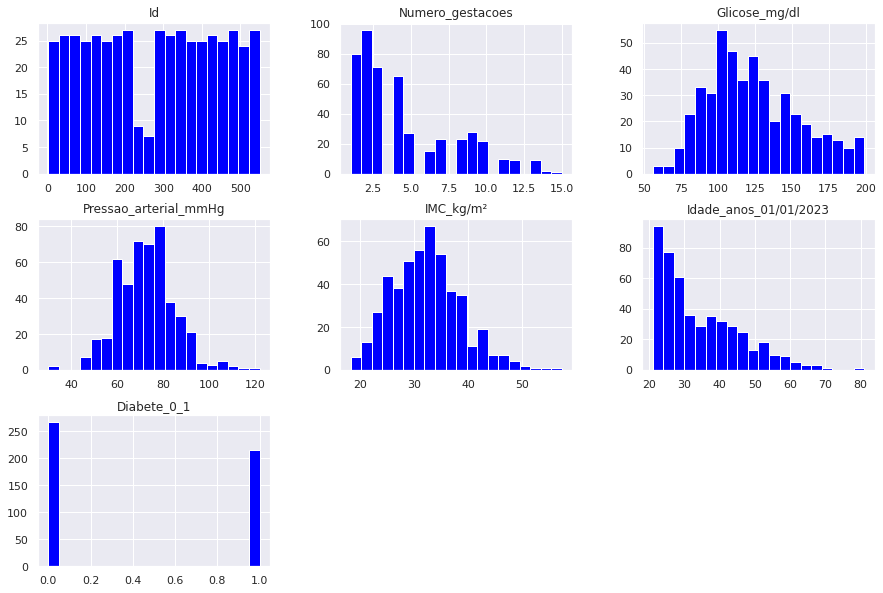

In [339]:
# Vamos analisar a distribuição dos nossos dados
sns.set(font_scale=1.0, rc={'figure.figsize':(15,10)})
eixo = dados.hist(bins=20, color='blue')

**USANDO O BOX PLOT PARA TENTAR VERIFICAR TENDÊNCIAS E/OU OUTLIERS**

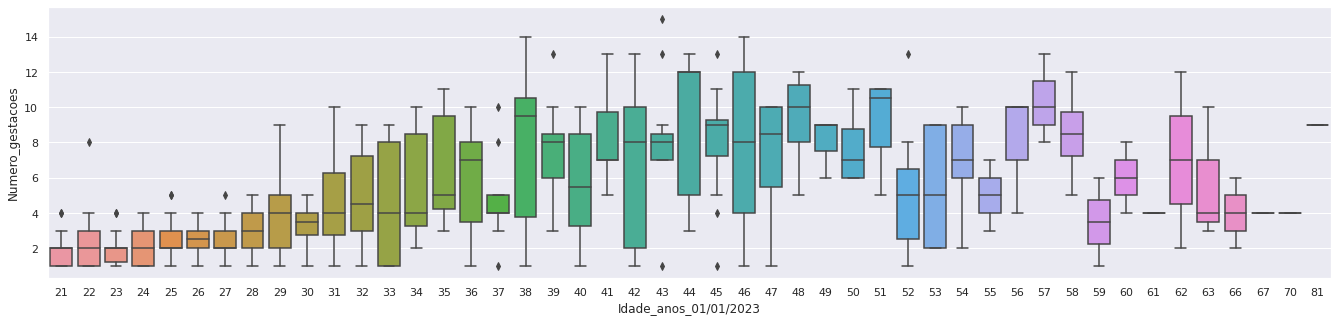

In [360]:
# Usando o boxplot, vamos tentar combinar algumas variáveis para encontrarmos alguns padrões e tendencias
# percebemos que atravez da análise, quanto maior a idade, maior o número de gestações em boa parte dos casos, como vimos na correlação anteriormente.

plt.figure(figsize=(23,5))
sns.boxplot(data=dados, x='Idade_anos_01/01/2023',y='Numero_gestacoes');